In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
link = sqlite3.connect('F:\My Project\Data Analysis\E-Commerce\Data/database.sqlite')

In [3]:
type(link)

sqlite3.Connection

In [4]:
df = pd.read_sql_query('SELECT * FROM Reviews', link)

In [5]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [6]:
!pip install Textblob

In [7]:
from textblob import TextBlob

In [8]:
polarity = []

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [9]:
len(polarity)

568454

In [10]:
d1 = df.copy()

In [11]:
d1['Polarity_Summary'] = polarity

In [12]:
d1.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity_Summary  
0               0.7  
1               0.0  
2               0.0  
3               0.0  
4               0.8

In [13]:
polarity = []

for i in df['Text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
len(polarity)

568454

In [15]:
d2 = df.copy()

In [16]:
d2['Polarity_Text'] = polarity

In [17]:
d1_positive = d1[d1['Polarity_Summary']>0]

In [18]:
d1_positive.shape

(331665, 11)

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud,STOPWORDS

In [21]:
stopwords = set(STOPWORDS)

In [22]:
d1_positive.head()

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   

                                         Summary  \
0                          Good Quality Dog Food   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   

                                                Text  Polarity_Summary  
0  I have bought several of the Vitality canned d...          0.700000  
4  Great taffy at a great price.  There was a wid...          0.800000  
5  I got a wild hair for taffy and ordered this f...          0.600000  
6  This saltwater taffy had great flavors and was...          0.358333  
7  This taffy is so good.  It is very soft and ch...          1.000000

# Perform EDA for postive sentences

In [23]:
text_summary = (' '.join(d1_positive['Summary']))

In [24]:
len(text_summary)

8465012

In [25]:
text_summary[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [26]:
import re
text_summary = re.sub('[^a-zA-z]',' ',text_summary)

In [27]:
text_summary[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [28]:
text_summary = re.sub(' +',' ',text_summary)

In [29]:
text_summary[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

(-0.5, 999.5, 499.5, -0.5)

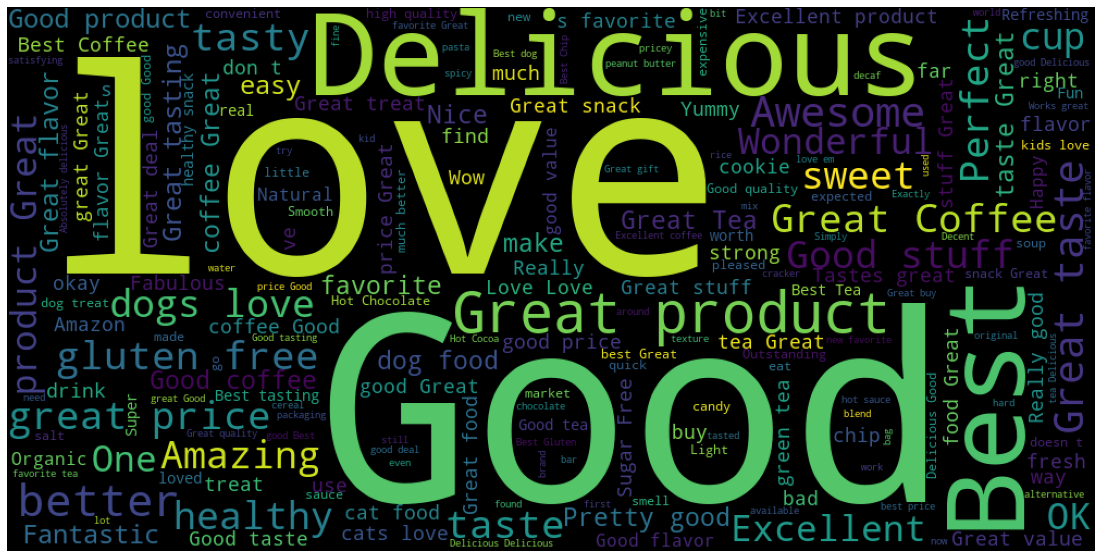

In [31]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords=stopwords).generate(text_summary)
plt.figure(figsize=(30,10))
plt.imshow(wordcloud)
plt.axis('off')

# Perform EDA for Negative Sentences

In [32]:
d1_negative = d1[d1['Polarity_Summary']<0]

In [33]:
d1_positive.shape

(331665, 11)

In [34]:
text_summary2 = (' '.join(d1_negative['Summary']))

In [35]:
text_summary2 = re.sub('[^a-zA-z]',' ',text_summary2)

In [36]:
text_summary2

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [37]:
text_summary2 = re.sub(' +',' ',text_summary2)

(-0.5, 999.5, 499.5, -0.5)

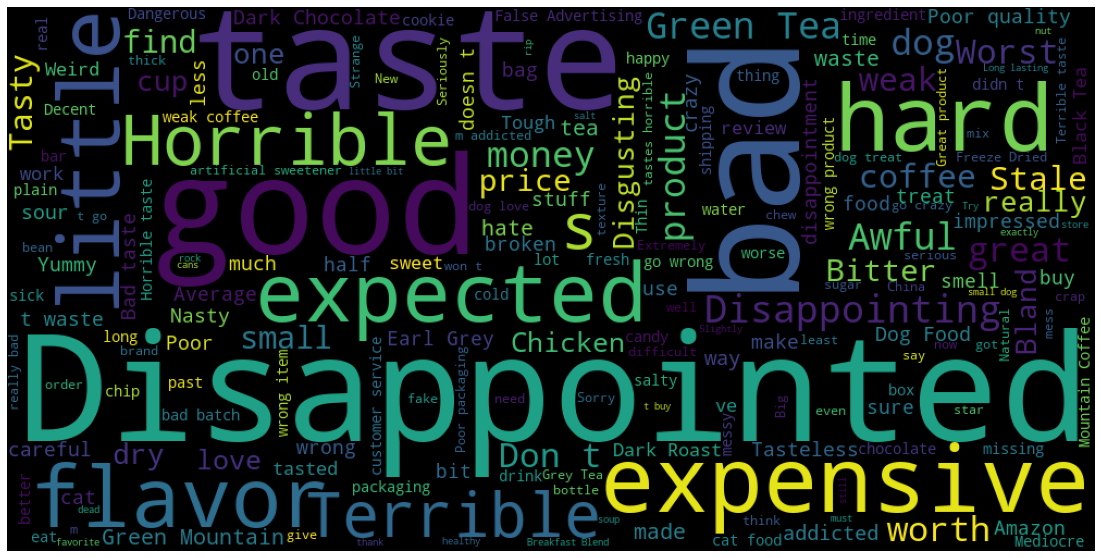

In [38]:
wordcloud2 = WordCloud(width = 1000, height = 500, stopwords=stopwords).generate(text_summary2)
plt.figure(figsize=(30,10))
plt.imshow(wordcloud2)
plt.axis('off')

# Analyze data : Find out customers to recommend more products

In [39]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [40]:
df['UserId'].nunique()

256059

In [41]:
data_customers = df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by = 'Text', ascending = False)

In [42]:
data_customers

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [43]:
data_customers.columns = ['num_of_summeries', 'num_of_text', 'avg_score', 'num_of_products_purchased' ]

In [44]:
data_customers

num_of_summeries  num_of_text  avg_score  \
UserId                                                     
A3OXHLG6DIBRW8               448          448   4.535714   
A1YUL9PCJR3JTY               421          421   4.494062   
AY12DBB0U420B                389          389   4.647815   
A281NPSIMI1C2R               365          365   4.841096   
A1Z54EM24Y40LL               256          256   4.453125   
...                          ...          ...        ...   
A2HROKQO0GA5AF                 1            1   3.000000   
A2HROR28DMJV2W                 1            1   5.000000   
A2HRR8CO2Y20G8                 1            1   5.000000   
A2HRSML93IK9TR                 1            1   5.000000   
AZZZOVIBXHGDR                  1            1   2.000000   

                num_of_products_purchased  
UserId                                     
A3OXHLG6DIBRW8                        448  
A1YUL9PCJR3JTY                        421  
AY12DBB0U420B                         389  
A281NPSIMI1C2R                        365  
A1Z54EM24Y40LL                        256  
...                                   ...  
A2HROKQO0GA5AF                          1  
A2HROR28DMJV2W                          1  
A2HRR8CO2Y20G8                          1  
A2HRSML93IK9TR                          1  
AZZZOVIBXHGDR                           1  

[256059 rows x 4 columns]

In [45]:
query_user1 = data_customers.index[0:30]
query_products1 = data_customers['num_of_products_purchased'][0:30]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

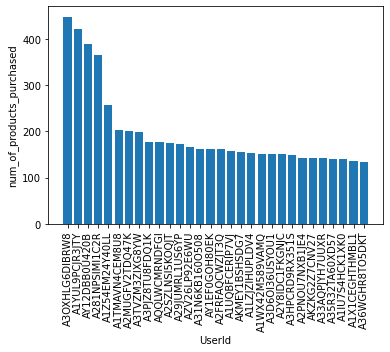

In [46]:
plt.bar(query_user1, query_products1, label = 'Most Recommend Users')
plt.xlabel('UserId')
plt.ylabel('num_of_products_purchased')
plt.xticks(rotation = 'vertical')

# Analyzing feedback from given customer

In [47]:
df.sample(n=10000)

Id   ProductId          UserId               ProfileName  \
98194    98195  B0030VJ70K  A1W92IOBND0VD4                        DL   
56301    56302  B0039ZOZ86  A3KGGURNYT4LNH                    rejebe   
313009  313010  B004UCA2F2   A5ZN0RKLTGCZI                 kandyroxy   
280481  280482  B005OVPKCI   A7T1NIWZHTC4P  Seven Kitties "7kitties"   
149303  149304  B001FYUVJU  A15SYT7EXWTJX8              ShoppaHaulic   
...        ...         ...             ...                       ...   
105423  105424  B001EQ4QJK  A12RKYH699SOC3                   J. Yang   
508338  508339  B001PQNV6S  A2MI8PH4RZPLYF                     Laura   
92223    92224  B0007R9L4M  A2OVI62NN5W0UE                     Amnia   
296852  296853  B001Q54UIQ  A3C7M9JF53TKW6                   Rodeman   
546933  546934  B003C5JXMQ  A2S3Z0WHCCDU3W   L. Davis "Nittany Lion"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
98194                      0                       1      3  1310256000   
56301                      2                       2      5  1280793600   
313009                     0                       0      5  1314921600   
280481                     0                       0      4  1338508800   
149303                     2                       2      5  1331078400   
...                      ...                     ...    ...         ...   
105423                     1                       1      5  1232496000   
508338                     0                       0      5  1222128000   
92223                      0                       1      5  1232496000   
296852                     1                       1      2  1341792000   
546933                     0                       0      5  1348444800   

                                                  Summary  \
98194   baby ate it all, but it stuck to him when it c...   
56301                                 Guilt free snack!!!   
313009  Inexplicably a favorite! Worth a try for your ...   
280481                                 Pretty darn tasty!   
149303  Goodbye Rawhides! Hello Peace of Mind - & Dogs...   
...                                                   ...   
105423                                      Perfect Snack   
508338                           Great Gluten Free Option   
92223                          Really Delicious but Gassy   
296852                      Very firm and odd smell/taste   
546933                             Great nutritional food   

                                                     Text  
98194   My baby seemed to like the flavor since he ate...  
56301   <a href="http://www.amazon.com/gp/product/B003...  
313009  My daughter has tried nearly all the Ella, Spr...  
280481  Here's the thing: I can't have dairy.  So I ca...  
149303  Love these! Well, because...we have 3 dogs (2 ...  
...                                                   ...  
105423  I love these almonds - they are the perfect sn...  
508338  My son loves these cookies! They're tasty and ...  
92223   I cannot tell that this is a vegetarian dish, ...  
296852  I stick with the bears from the store after tr...  
546933  My white shepherd loves this food.  It is nutr...  

[10000 rows x 10 columns]

In [48]:
final_data = df[0:10000]

In [49]:
final_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [50]:
final_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [51]:
final_data.duplicated().sum()

0

In [52]:
len(final_data['Text'][0].split(' '))

49

In [53]:
def cal_len(text):
    return len(text.split(' '))

In [54]:
final_data['Text_length'] = final_data['Text'].apply(cal_len)

C:\Users\Rutton\AppData\Local\Temp\ipykernel_21292\1193246493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Text_length'] = final_data['Text'].apply(cal_len)


In [55]:
!pip install plotly

In [56]:
import plotly.express as px

In [57]:
px.box(final_data, y = 'Text_length')

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

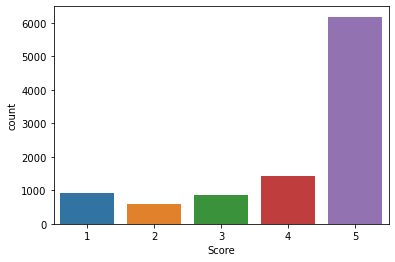

In [58]:
sns.countplot(final_data['Score'])

# Analyzing Customer Behaviour

In [59]:
final_data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [60]:
final_data['Text'] = final_data['Text'].str.lower()

C:\Users\Rutton\AppData\Local\Temp\ipykernel_21292\4142081858.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
final_data['Text'][256]

"these nature valley nut lovers variety pack was perfect. although i wasn't sure about the peanut butter bar, it was excellent. i loved the roasted almond, roasted pecan and the peanut butter.<br /><br />i will definately buy from this seller again. quick shipping and very fresh."

In [62]:
pun = '''!(){}[]@#:,"<>?/\|_*$^'''
dt = final_data['Text'][164]
no_pun = ''
for char in dt:
    if char not in pun:
         no_pun = no_pun + char
no_pun

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [63]:
import string
pun = string.punctuation

def remove_pun(review):
    no_pun = ''
    for char in review:
        if char not in pun:
            no_pun = no_pun + char
    return no_pun

In [64]:
final_data['Text'] = final_data['Text'].apply(remove_pun)

C:\Users\Rutton\AppData\Local\Temp\ipykernel_21292\2485363737.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
final_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   
3         Cough Medicine  if you are looking for the secret ingredient i...   
4            Great taffy  great taffy at a great price  there was a wide...   

   Text_length  
0           49  
1           31  
2           99  
3           43  
4           30

In [66]:
final_data['Text'][164]

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [67]:
!pip install nltk

In [68]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rutton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [70]:
final_data['Text'] = final_data['Text'].apply(remove_stopwords)

C:\Users\Rutton\AppData\Local\Temp\ipykernel_21292\2831610470.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
final_data['Text'][164]

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

In [72]:
final_data['Text'].str.contains('http?').sum()

226

In [73]:
pd.set_option('display.max_rows',100)
final_data['Text'].str.contains('http?')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Text, Length: 10000, dtype: bool

In [74]:
final_data['Text'][21]

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [75]:
def remove_pattern1(review):
    pattern1 = re.compile(r'href|http.\w+')
    return pattern1.sub(r'', review)

In [77]:
 final_data['Text'] = final_data['Text'].apply(remove_pattern1)

C:\Users\Rutton\AppData\Local\Temp\ipykernel_21292\4138974460.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
final_data['Text'].str.contains('http').sum()

0

In [79]:
final_data['Text'].str.contains('br').sum()

4010

In [80]:
for i in range(len(final_data['Text'])):
    final_data['Text'][i] = final_data['Text'][i].replace('br', '')

C:\Users\Rutton\AppData\Local\Temp\ipykernel_21292\3864096326.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
words = ' '.join(final_data['Text'])

In [90]:
stopwords = set(STOPWORDS)

(-0.5, 9999.5, 9999.5, -0.5)

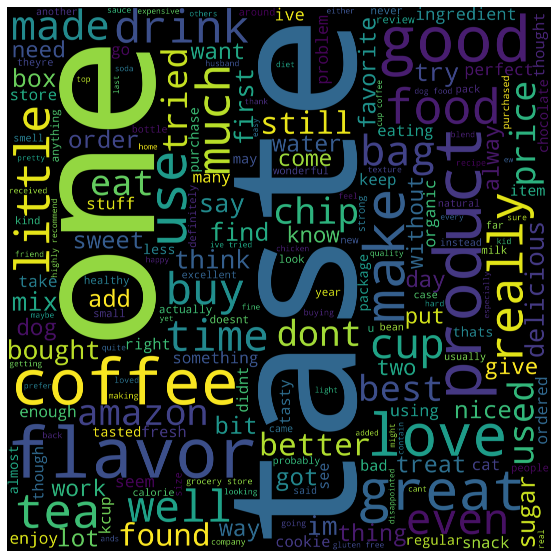

In [91]:
wordcloud = WordCloud(width = 10000, height = 10000, stopwords=stopwords).generate(words)
plt.figure(figsize=(30,10))
plt.imshow(wordcloud)
plt.axis('off')